In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('cars.csv')
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [3]:
X = data.speed.values.reshape(-1, 1)
y = data.dist.values.reshape(-1, 1)

In [4]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

Prediction of distance with speed=40:  139.71725547445254
Предсказание длины тормозного пути при скорости 40 миль в час с помощью квадратичной регрессии: 198.93652566652014


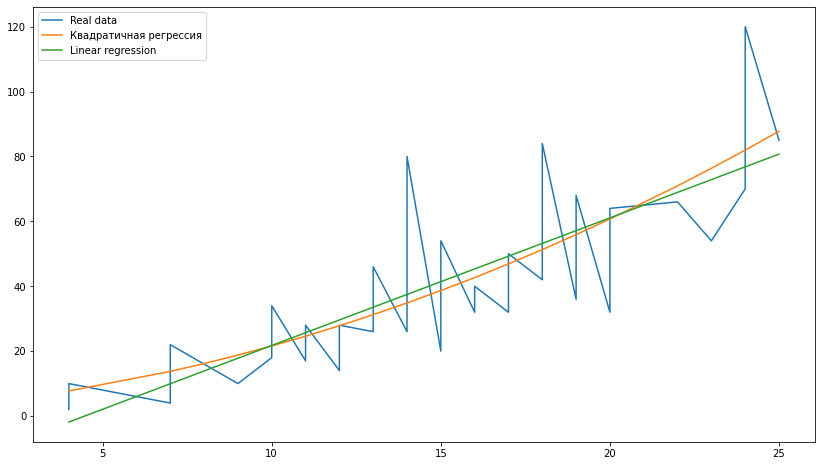

In [9]:
plt.figure(figsize=(14, 8))
plt.plot(X, y, label='Real data')
sq = LinearRegression()
sq.fit(X_poly, y)
plt.plot(X, sq.predict(X_poly), label='Квадратичная регрессия')
linear = LinearRegression()
linear.fit(X, y)
plt.plot(X, linear.predict(X), label='Linear regression')
X_predict = np.array(40).reshape(1, -1)
print('Prediction of distance with speed=40: ', 
      linear.predict(X_predict)[0][0])
X_poly_predict = polynomial_features.fit_transform(np.array(40).reshape(1, -1))
print('Предсказание длины тормозного пути при скорости 40 миль в час с помощью квадратичной регрессии:', 
      sq.predict(X_poly_predict)[0][0])
plt.legend()

In [6]:
print('MSE линейной регрессии:', mean_squared_error(y, linear.predict(X)))
print('MSE квадратичной регрессии:', mean_squared_error(y, sq.predict(X_poly)))

MSE линейной регрессии: 227.07042102189777
MSE квадратичной регрессии: 216.49431815339992
